In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report 
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['Class'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


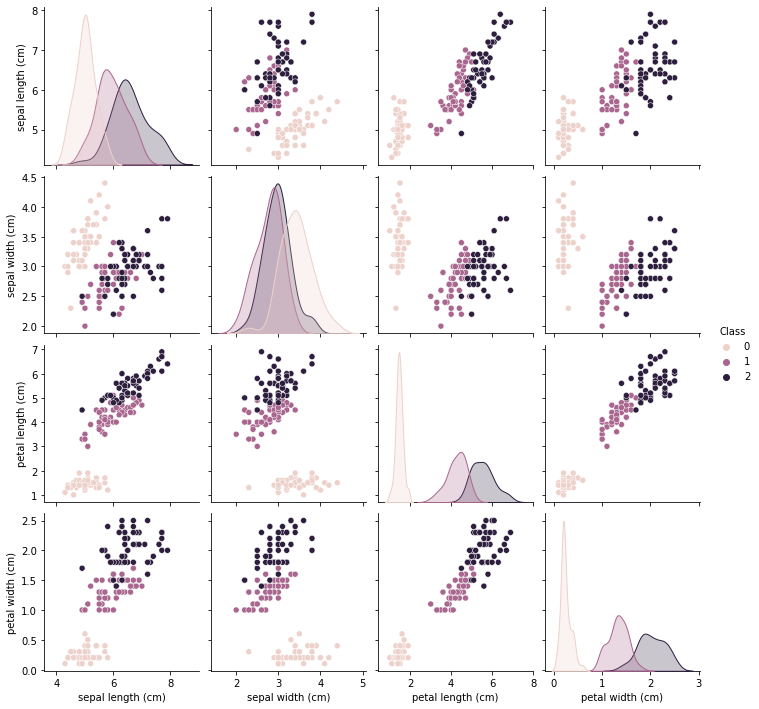

In [3]:
sns.pairplot(df,hue='Class')
plt.show()

In [4]:
X = df.drop(columns=['Class'])
y = df['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [26]:
class Bagging:

  def fit(self,X_train,y_train,B=30,C=4,max_depth = 100, min_size = 2, seed = None):
    self.X_train = X_train
    self.N, self.D = X_train.shape
    self.y_train = y_train
    self.B = B
    self.C = C
    self.seed = seed
    self.trees = []
    self.max_depth = max_depth
    np.random.seed(seed)
    for b in range(self.B):
      sample = np.random.choice(np.arange(self.N), size = self.N, replace = True)
      X_train_b = X_train.iloc[sample]
      y_train_b = y_train.iloc[sample]
      tree = DecisionTreeClassifier()
      tree.fit(X_train_b, y_train_b)
      self.trees.append(tree)

  
  def predict(self, X_test):
    y_test_hats = np.empty((len(self.trees), len(X_test)))
    for i, tree in enumerate(self.trees):
      y_test_hats[i] = tree.predict(X_test)
    return y_test_hats

In [23]:
X_train.shape

(112, 4)

In [27]:
bagger =Bagging()
bagger.fit(X_train,y_train)

In [ ]:
bagger.predict(X_test)

In [37]:
from scipy import stats
m = stats.mode(bagger.predict(X_test))
print(m.mode.shape)

(1, 38)


In [40]:
print(accuracy_score(m.mode.reshape(-1,1),y_test)*100,'%')

100.0 %
